In [42]:
from ImportLeague import getLeague
from ImportData import getTeamData
from ImportData import getPlayerData
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pickle

In [2]:
# Import Data
myLeague = getLeague()
teamData_defense,teamData_offense = getTeamData()
playerData = getPlayerData(myLeague,teamData_defense,teamData_offense)


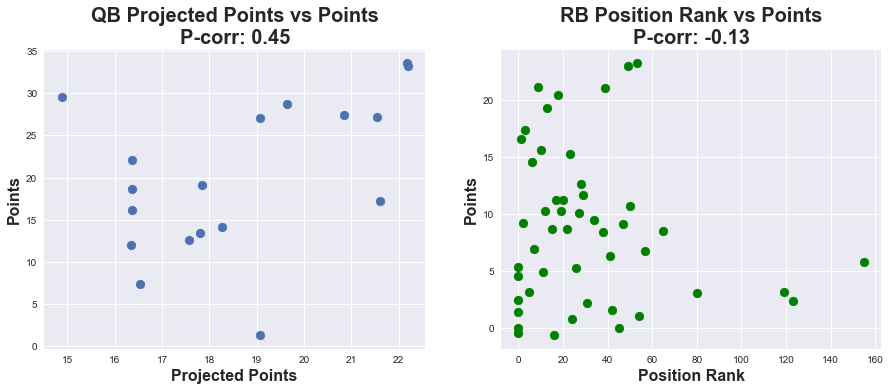

In [41]:
# list(PRO_TEAM_MAP.values()).index(player.proTeam)
# plt.scatter(playerData['QB']['Position Rank'],playerData['QB']['Points'])
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5.5), facecolor='w', edgecolor='k')

ax1.scatter(playerData['QB']['Projected Points'],playerData['QB']['Points'],s = 80)
proj_corr_QB = np.corrcoef(playerData['QB']['Projected Points'].to_numpy(dtype=float),playerData['QB']['Points'].to_numpy(dtype=float))[0][1]
ax1.grid(b=True) 
ax1.set_title('QB Projected Points vs Points\nP-corr: {:0.2f}'.format(proj_corr_QB),fontweight='bold',fontsize = 20)
ax1.set_xlabel('Projected Points',fontweight='bold',fontsize = 16)
ax1.set_ylabel(r'Points',fontweight='bold',fontsize = 16)

ax2.scatter(playerData['RB']['Position Rank'],playerData['RB']['Points'],c='g',s = 80)
posRank_corr_RB = np.corrcoef(playerData['RB']['Position Rank'].to_numpy(dtype=float),playerData['RB']['Points'].to_numpy(dtype=float))[0][1]
ax2.grid(b=True) 
ax2.set_title('RB Position Rank vs Points\nP-corr: {:0.2f}'.format(posRank_corr_RB),fontweight='bold',fontsize = 20)
ax2.set_xlabel('Position Rank',fontweight='bold',fontsize = 16)
ax2.set_ylabel(r'Points',fontweight='bold',fontsize = 16)

fig.savefig('Images/FRL_1.png',)

In [71]:
df = playerData['D/ST'][['Position Rank','Projected Points','Season Projected Points']]
normalized_df=(df-df.min())/(df.max()-df.min()) 

regr = linear_model.LinearRegression()
regr.fit(normalized_df[['Position Rank','Projected Points','Season Projected Points']], playerData['D/ST'][['Points']])

print('Defense/Special Teams Regression coefficients: ', regr.coef_)
    

Defense/Special Teams Regression coefficients:  [[-6.85884022  2.79272909 -9.31509104]]
